#  实验结果记录

In [1]:
# 记录使用input anderson normalize(0, 1)后的结果
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

import torch
import pandas as pd

In [2]:
def get_median_abs(output_f, index = 0):
    return np.median(np.abs(np.array(output_f[:, index, 0, 0])))

In [3]:
# 保存成andersondatase，才能进行训练。
def save_median(save_median, chebyshev, anderson):
    save_h5 = h5py.File(save_median, 'w')
    save_h5.create_dataset('chebyshev', data=chebyshev, dtype='float64')
    save_h5.create_dataset('anderson', data=anderson)
    save_h5.close()
    

In [4]:
save_median = 'datasets/chebyshev_0_4000.h5'

In [5]:
c_h5 = h5py.File(save_median, 'r')
np.array(c_h5['anderson'][0,:, 0,0]), np.array(c_h5['chebyshev'][0, :, 0, 0])

(array([ 6.96469186,  0.2065269 ,  1.63142385,  4.40297536, -4.13522458,
         0.86176524,  1.3410227 ,  0.41840878]),
 array([1.00447011]))

# h5py
```
{
"model_000":{
    "log_dict":{
        'train_loss_per_batch':[],
        'train_loss_per_epoch': [],
        'validate_loss_per_batch': [],  #可选
        'validate_loss_per_epoch':[]    #可选
        }
    }
"model_001":{}
}
```

In [6]:
def plot_loss_epoch(file, title, n_model='model_000', train_only=False, begin=0):
        with h5py.File(file, 'r') as loss_f:
            train_grp = loss_f[n_model]['log_dict']
            train_loss = train_grp['train_loss_per_epoch'][:]
            validate_loss = train_grp['validate_loss_per_epoch'][:]

            test_loss = loss_f[n_model]['test_log_dict']['test_loss_per_epoch'][:]
            
            train_loss = np.sqrt(np.array(train_loss))
            validate_loss = np.sqrt(np.array(validate_loss))
            test_loss = np.sqrt(np.array(test_loss))
            plt.plot(np.arange(len(train_loss) - begin)+1 + begin, train_loss[begin:], '-o', label='train')
            plt.plot(len(train_loss), test_loss[0], '-o', label='test')

            if train_only is False:
                plt.plot(np.arange(len(validate_loss) - begin)+1 + begin, validate_loss[begin:], '-o', label='validate')
            plt.grid()
            plt.xlabel('Epoch')
            plt.ylabel('RMSE')
            plt.title(label=title)
            plt.legend()
            print(f'train_loss : {train_loss[-1]}')
            print(f'validate_loss : {validate_loss[-1]}')
            print(f'test_loss : {test_loss[-1]}')


In [7]:
def plot_loss_batch(file, title, n_model='model_000', train_only=True, begin=0):
        with h5py.File(file, 'r') as loss_f:
            train_grp = loss_f[n_model]['log_dict']
            train_loss = train_grp['train_loss_per_batch'][:]
            validate_loss = train_grp['validate_loss_per_batch'][:]

            test_loss = loss_f[n_model]['test_log_dict']['test_loss_per_batch'][:]
            
            train_loss = np.sqrt(np.array(train_loss))
            validate_loss = np.sqrt(np.array(validate_loss))
            test_loss = np.sqrt(np.array(test_loss))
            plt.plot(np.arange(len(train_loss) - begin)+1 + begin, train_loss[begin:], '-o', label='train')
            plt.plot(len(train_loss), test_loss[0], '-o', label='test')

            if train_only is False:
                plt.plot(np.arange(len(validate_loss) - begin)+1 + begin, validate_loss[begin:], '-o', label='validate')
            plt.grid()
            plt.xlabel('Batch')
            plt.ylabel('RMSE')
            plt.title(label=title)
            plt.legend()
            print(f'train_loss : {train_loss[-1]}')
            print(f'validate_loss : {validate_loss[-1]}')
            print(f'test_loss : {test_loss[-1]}')


In [8]:
def subfigure_loss(file, title, n_model='model_000'):
    part = 4
    h5 = h5py.File(file, 'r')
    fig = plt.figure(figsize=(8, 5))
    idx = 0
    loss_scale = np.array([0, 10, 20, 30])         # 前面的loss太高了
    train_grp = h5[n_model]['log_dict']
    train_loss = train_grp['train_loss_per_epoch'][:]
    validate_loss = train_grp['validate_loss_per_epoch'][:]
    test_loss = h5[n_model]['test_log_dict']['test_loss_per_epoch'][:]
    figure_len = len(train_loss) // (part - 1)
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.title(label=title)
    for i in range(part-1):
        x_axis = np.arange(i * figure_len, (i + 1) * figure_len )
        print(x_axis)
        ax_i = fig.add_subplot(1, part, idx+1)
        train = train_loss[x_axis]
        validate = validate_loss[x_axis]
        ax_i.plot(x_axis+1, train, '-o', label='train loss')
        ax_i.plot(x_axis+1, validate, '-o', label='validate loss')
        idx += 1
        ax_i.grid()
        # ax_i.axis('off')
    if (part-1) * figure_len < len(train_loss):
        ax_i = fig.add_subplot(1, part, idx+1)
        x_axis = np.arange((part-1) * figure_len , len(train_loss))
        print(x_axis)
        train = train_loss[x_axis]
        validate = validate_loss[x_axis]
        ax_i.plot(x_axis+1, train, '-o', label='train loss')
        ax_i.plot(x_axis+1, validate, '-o', label='validate loss')
        ax_i.grid()
        # ax_i.axis('off')
    ax_i.plot(len(train_loss), test_loss[0], '1', label='test loss')
    handles, labels = ax_i.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    # TODO visual improve

    savename = file.split('.')[0]
    # fig.savefig(savename + '.png')
    plt.show()
    h5.close()


## layer 7

[0 1 2 3 4 5]
[ 6  7  8  9 10 11]
[12 13 14 15 16 17]
[18 19]


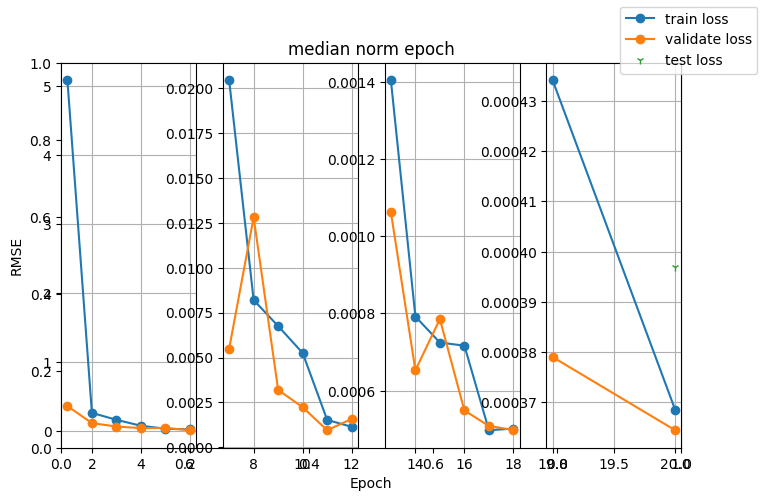

In [11]:
# 使用median规范后，进行训练，训练配置文件config_1.json，每个epoch训练的rmse如下图所示。
subfigure_loss(file='nn_7/loss_1.h5', title="median norm epoch")

train_loss : 0.01919800600457773
validate_loss : 0.019091421081176004
test_loss : 0.019925255424611772


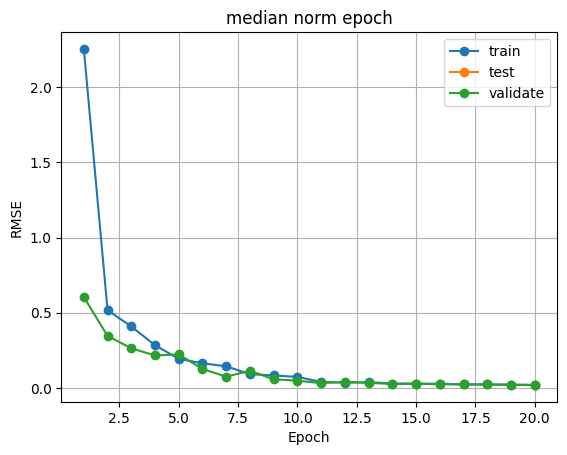

In [12]:
# plot epoch loss
plot_loss_epoch(file='nn_7/loss_1.h5', title="median norm epoch", begin=0)

train_loss : 0.019311491370535325
validate_loss : 0.019091421081176004
test_loss : 0.019925255424611772


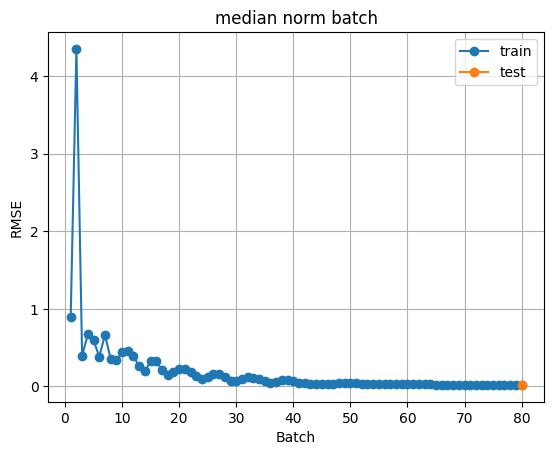

In [13]:
# plot batch loss

plot_loss_batch(file='nn_7/loss_1.h5', title="median norm batch", begin=0)


In [14]:
file = 'nn_7/loss_1.h5'
h5 = h5py.File(file, 'r')
h5['model_000']['log_dict']['train_loss_per_batch'][-8:],h5['model_000']['log_dict']['validate_loss_per_batch'][-2:]

(array([0.00047923, 0.00045775, 0.00038872, 0.00041075, 0.00035946,
        0.00037398, 0.00036788, 0.00037293]),
 array([0.00037904, 0.00036448]))

## layer 14
训练的方法如下，配置文件件config_2.json, 使用from nn_models import MyMLP_14 as MyMLP，选择神经网络。
与layer14 除了网络不一样，其他训练参数，数据集保持不变。从loss结果来看，数值变小了。

In [1]:
training_file = "datasets/chebyshev_0_4000.h5"
testing_file = "datasets/chebyshev_testing_1000.h5",
# train data
from run_mlp import main
from nn_models import MyMLP_14 as MyMLP   
main('config_2.json', network=MyMLP)

epoch 1 in training:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 3/4 [00:00<00:00,  6.53it/s]
                                                                                                                                                                                                                                                 train-mlp - INFO - Epoch : 1/20  train loss: 0.6715781202

  0%|                                                                                                                                                                                                                     | 0/1 [00:00<?, ?it/s]
                                                                                                                                                                                                                          

train_loss : 0.006934816875586985
validate_loss : 0.007342899692516616
test_loss : 0.007274888447455085


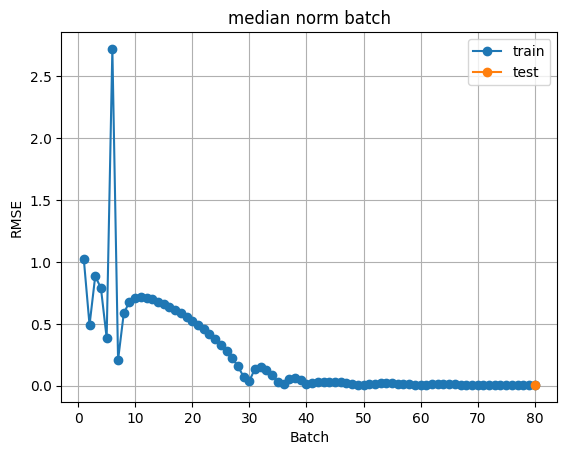

In [15]:
# plot batch loss

plot_loss_batch(file='nn_14/loss_2.h5', title="median norm batch", begin=0)


[0 1 2 3 4 5]
[ 6  7  8  9 10 11]
[12 13 14 15 16 17]
[18 19]


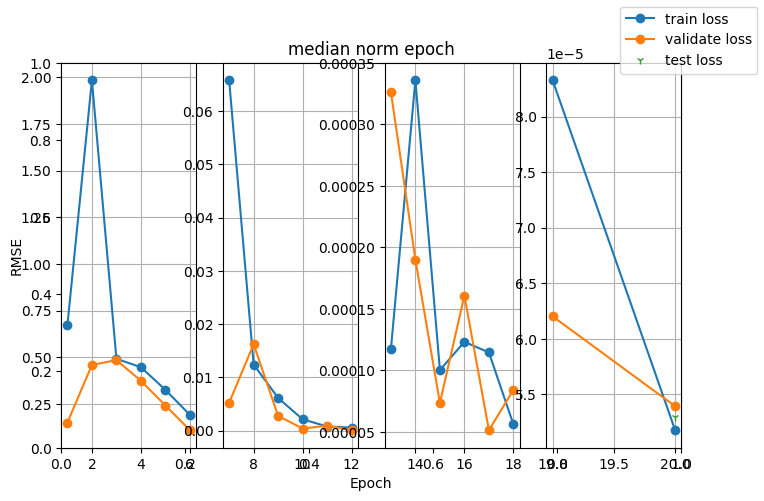

In [16]:
# 使用median规范后，进行训练，训练配置文件config_1.json，每个epoch训练的rmse如下图所示。
subfigure_loss(file='nn_14/loss_2.h5', title="median norm epoch")

In [17]:
file = 'nn_14/loss_2.h5'
h5 = h5py.File(file, 'r')
h5['model_000']['log_dict']['train_loss_per_batch'][-8:],h5['model_000']['log_dict']['validate_loss_per_batch'][-2:]

(array([8.56279566e-05, 7.98107097e-05, 8.61176768e-05, 8.15223096e-05,
        5.92012271e-05, 5.56063099e-05, 4.41345815e-05, 4.80916851e-05]),
 array([6.20091832e-05, 5.39181759e-05]))

train_loss : 0.0071943346395502965
validate_loss : 0.007342899692516616
test_loss : 0.007274888447455085


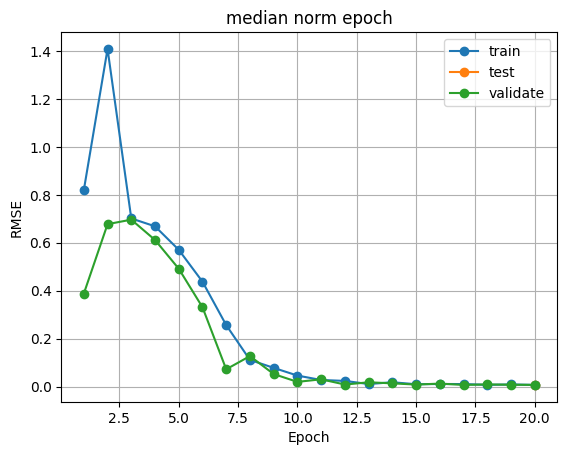

In [18]:
plot_loss_epoch(file='nn_14/loss_2.h5', title="median norm epoch", begin=0)

从上面看， 配置不变，网络加深，loss是变小了。

# 改进方法探索

## Increase the size of your training dataset

## Normalize your input data
Scaling the input features to a similar range can prevent certain features from dominating the learning process and help the MLP model converge faster.